In [2]:
%load_ext autoreload
%autoreload 2

from cleaning_text import detect_language, is_not_string, process_in_batches
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tqdm import tqdm
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
df = pd.read_csv('TIKTOK_REVIEWS.csv', index_col=0)

df.loc[df['review_rating'] >= 4,'sentiment'] = "positive"
df.loc[df['review_rating'] == 3,'sentiment'] = "neutral"
df.loc[df['review_rating'] < 3,'sentiment'] = "negative"

In [4]:
df.head()

,review_id,pseudo_author_id,author_name,review_text,review_rating,review_likes,author_app_version,review_timestamp,sentiment
0,c6f14d9b-61ec-455c-9b11-9d05331362c2,392735140710813970788,Ad******as,Adil_abbas7,5,0,17.4.2,2020-08-16 17:46:05,positive
1,f5640090-ebc7-472a-824b-ebf89155b363,939952661006796816839,Re**********is,best app,5,0,17.3.4,2020-08-16 17:46:05,positive
2,40c98362-a25d-4f20-9fb4-1ef46e736728,160177883577467325216,Al******an,Gondal Badsha Mandi alaa,5,0,16.3.5,2020-08-16 17:46:18,positive
3,898bb970-f8da-4f2f-b83b-68aae71974c1,466026669372387032245,Mu**********id,Ubaidgame,5,0,17.2.4,2020-08-16 17:46:27,positive
4,6796d65a-b2ab-4042-9d68-241895d7048d,108678948795919826063,Am***********de,Best app,5,0,NaN,2020-08-16 17:46:44,positive


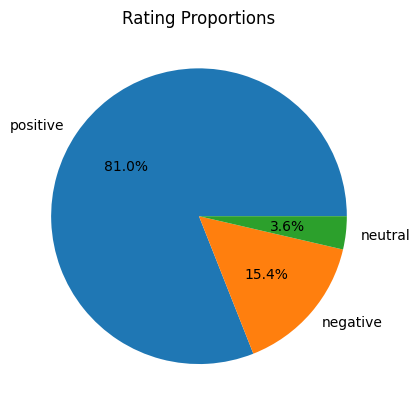

In [5]:
df['sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Rating Proportions')
plt.ylabel('')
plt.show()

### Checking for non-string reviews

In [6]:
batch_size = 100000

non_string_rows = pd.DataFrame(columns=df.columns)

for start in tqdm(range(0, len(df), batch_size), desc="Processing"):
    end = min(start + batch_size, len(df))
    batch = df.iloc[start:end]
    non_string_batch = batch[batch['review_text'].apply(is_not_string)]
    non_string_rows = pd.concat([non_string_rows, non_string_batch], ignore_index=True)

Processing: 100%|██████████| 35/35 [00:00<00:00, 35.66it/s]


In [9]:
# checking if the text without string are all null
non_string_rows['review_text'].isna().sum() == len(non_string_rows)

True

In [10]:
# dropping na values
df.dropna(subset=['review_text'], inplace=True)

### Determing the Languages Used in Text

In [11]:
# Assuming your data is in a DataFrame called 'df' and the column of interest is 'text_column'
sample_size = 0.01  # 5% of the dataset
sampled_df = df.sample(frac=sample_size)

In [15]:
# Detecting the languages to consider
sampled_df['detected_language'] = sampled_df['review_text'].apply(detect_language)

In [46]:
# it apperars that those labeled unknown contain emojis
sampled_df[sampled_df['detected_language'] == 'unknown'].head(2)

,review_id,pseudo_author_id,author_name,review_text,review_rating,review_likes,author_app_version,review_timestamp,sentiment,detected_language
1091110,596a553b-2542-47ba-bbce-7f564a4462a2,255368606784021282471,Ab********se,❤️ 🌹 🦋 🏆 🏌️,5,0,20.3.3,2021-07-14 22:00:31,positive,unknown
1709501,2c0120e1-5fcf-45af-b4b4-95ed09718f54,228264990245916219009,Mu**********dd,🤚,5,0,21.3.3,2022-01-17 07:28:01,positive,unknown


In [47]:
sampled_df.loc[sampled_df['detected_language'] == 'unknown', 'detected_language'] = 'emoji'

In [48]:
is_more_than_1_percent = sampled_df['detected_language'].value_counts(normalize=True) >= 0.01
most_frequent_languages = list(is_more_than_1_percent.index[is_more_than_1_percent == True])

In [49]:
most_frequent_languages

['en',
 'so',
 'ro',
 'af',
 'it',
 'emoji',
 'no',
 'de',
 'sk',
 'id',
 'sw',
 'fr',
 'sl',
 'tl',
 'pl',
 'ca',
 'et']

In [ ]:
# use spacy to incorporate stop words


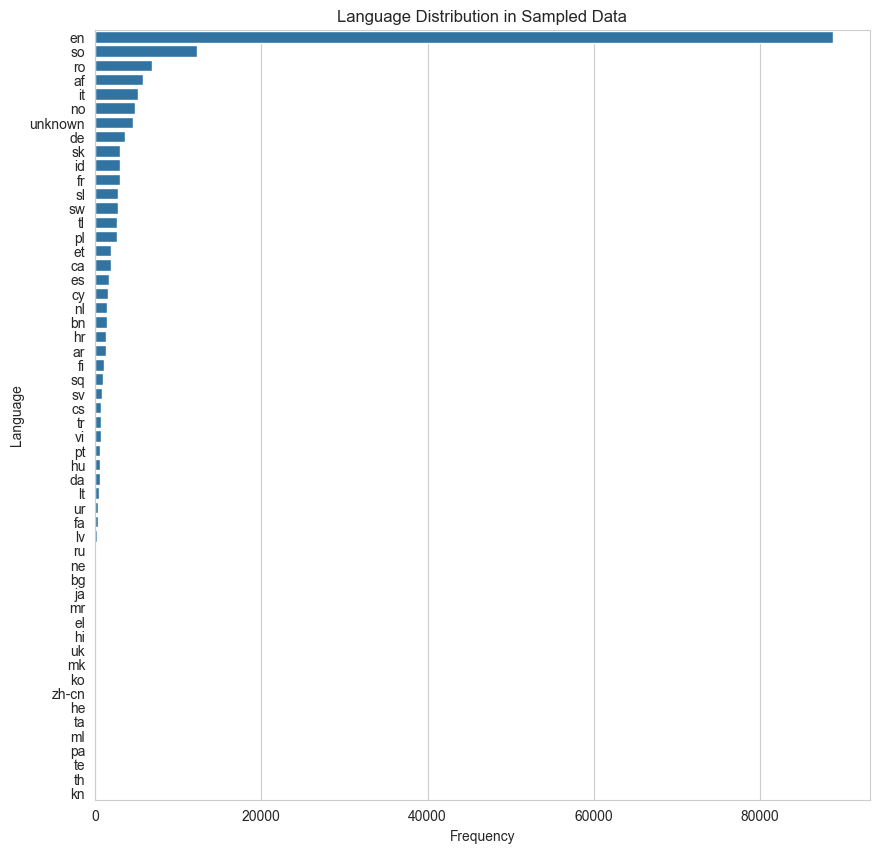

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

language_distribution = sampled_df['detected_language'].value_counts()

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 10))
language_plot = sns.barplot(x=language_distribution.values, y=language_distribution.index)

# Add labels and title
plt.xlabel('Frequency')
plt.ylabel('Language')
plt.title('Language Distribution in Sampled Data')

# Show the plot
plt.show()


In [40]:
sampled_df.to_pickle("sampled_df.pkl")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/brandonbell/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/brandonbell/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/brandonbell/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [42]:
sampled_df[sampled_df['detected_language'] == 'kn']

,review_id,pseudo_author_id,author_name,review_text,review_rating,review_likes,author_app_version,review_timestamp,sentiment,detected_language
1278097,11105085-ab08-4f87-9659-c4b8ab5469fd,288204601447613488456,Da*********ha,ಟಖಜಢ2457,5,0,20.8.4,2021-08-23 08:48:40,positive,kn
628738,b905da12-e7bd-4d98-b024-b2b38e689f9a,382003730384053810540,AR*****************aw,𝕊𝕠 𝕚𝕟𝕥𝕖𝕣𝕖𝕤𝕥𝕚𝕟𝕘ಠ_ಠ🥺💜,5,0,18.5.6,2021-02-18 17:05:46,positive,kn


In [45]:
sampled_df['detected_language'].value_counts().sort_values(ascending=True)

detected_language
kn             2
pa             2
th             2
te             2
ml             4
ta             5
he             7
zh-cn         10
ko            11
mk            13
uk            13
hi            14
el            16
mr            19
ja            20
bg            24
ne            31
ru            79
lv           241
fa           332
ur           401
lt           552
da           569
hu           635
pt           667
vi           712
tr           744
cs           777
sv           908
sq           948
fi          1125
ar          1380
hr          1381
bn          1416
nl          1468
cy          1629
es          1716
ca          1917
et          1990
pl          2626
tl          2633
sw          2748
sl          2762
fr          2960
id          2969
sk          2991
de          3559
unknown     4612
no          4793
it          5182
af          5746
ro          6876
so         12298
en         88746
Name: count, dtype: int64

In [55]:
language_counts = sampled_df['detected_language'].value_counts() < 80
rare_languages = language_counts[language_counts.values]
rare_language_names = rare_languages.index.to_list()

In [77]:
rare_language_names

['ru',
 'ne',
 'bg',
 'ja',
 'mr',
 'el',
 'hi',
 'uk',
 'mk',
 'ko',
 'zh-cn',
 'he',
 'ta',
 'ml',
 'pa',
 'te',
 'th',
 'kn']

# Determining the Languages

In [26]:
df['language'] = process_in_batches(df, detect_language, batch_size=100000)

  0%|          | 0/35 [02:38<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
df

In [8]:
df['language'] = df['review_text'].apply(detect_language)

TypeError: expected string or bytes-like object

### Balancing the Dataset

In [7]:
from imblearn.under_sampling import RandomUnderSampler

In [8]:
res = RandomUnderSampler(sampling_strategy={'positive':500000,'negative':500000,'neutral':125000})

In [9]:
X = df['review_text']
X = X.values.reshape(-1, 1)

y = df['sentiment']

In [10]:
# Assuming X and y are your features and labels respectively
X_resampled, y_resampled = res.fit_resample(X, y)

In [19]:
from cleaning_text import preprocess_text, preprocess_texts_parallel

ImportError: cannot import name 'preprocess_texts_parallel' from 'cleaning_text' (/Users/brandonbell/Desktop/coding/sentiment_analysis/cleaning_text.py)

In [18]:
X_resampled.shape

(1125000, 1)

In [ ]:
processed_texts_parallel = preprocess_texts_parallel(X_resampled)

### Vectorization

In [34]:
from transformers import AutoTokenizer, AutoModel
import torch
import numpy as np
from tqdm import tqdm

In [27]:
X_resampled.shape

(1125000, 1)

In [35]:
# Load pre-trained model tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("bert-base-multilingual-cased")
model = AutoModel.from_pretrained("bert-base-multilingual-cased", return_dict=True)

# Function to process a batch of texts
def process_batch(texts):
    inputs = tokenizer(texts, return_tensors="pt", padding=True, truncation=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

# Assuming X is a numpy array with shape (3465866, 1)
# Convert X to a 1D array if it's not already
X_resampled = X_resampled.ravel()  # This flattens the array to 1D if needed

# Batch processing
batch_size = 100  # Adjust this based on your system's capabilities
embeddings = []

for start_idx in tqdm(range(0, len(X_resampled), batch_size), desc="Processing"):
    end_idx = start_idx + batch_size
    batch_texts = X_resampled[start_idx:end_idx].tolist()  # Convert batch to list
    batch_embeddings = process_batch(batch_texts)
    embeddings.append(batch_embeddings)

# Concatenate all embeddings
X_embeddings = np.vstack(embeddings)

Processing:   0%|          | 1/11250 [00:54<170:14:35, 54.48s/it]


KeyboardInterrupt: 